In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc

Create scanpy object

In [51]:
adata = sc.read("../data/counts.tsv", first_column_names=True)
adata = adata.T
metadata = pd.read_csv("../data/cell_metadata_cols.tsv", header=0, index_col=0, sep='\t')
adata.obs = metadata
adata.raw = adata

Find highly variable genes

In [52]:
sc.pp.highly_variable_genes(adata, batch_key='experiment', n_top_genes=500)

... storing 'auxDir' as categorical
... storing 'day' as categorical
... storing 'donor' as categorical
... storing 'expected_format' as categorical
... storing 'experiment' as categorical
... storing 'library_types' as categorical
... storing 'libType' as categorical
... storing 'mapping_type' as categorical
... storing 'salmon_version' as categorical
... storing 'samp_type' as categorical
... storing 'start_time' as categorical
... storing 'well_id' as categorical
... storing 'well_type' as categorical
... storing 'donor_short_id' as categorical
... storing 'donor_long_id' as categorical


Scale data

In [53]:
sc.pp.scale(adata)

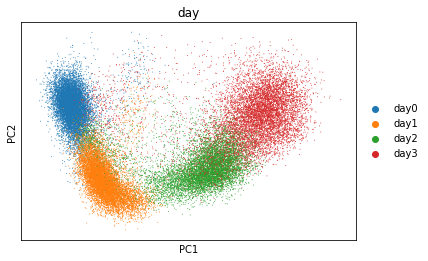

In [54]:
sc.tl.pca(adata, svd_solver='arpack', use_highly_variable=500)
sc.pl.pca(adata, color="day")

In [56]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

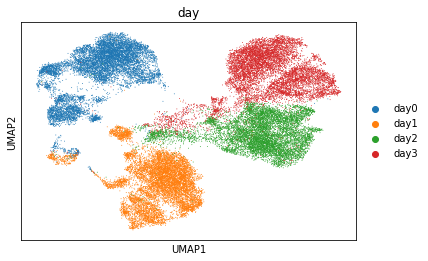

In [57]:
sc.pl.umap(adata, color="day")

Save this object for future use

In [58]:
adata.write("../data/sc.endo.dr.h5ad")

In [59]:
adata.write_loom("../data/sc.endo.dr.loom")

The loom file will lack these fields:
{'X_umap', 'PCs', 'X_pca'}
Use write_obsm_varm=True to export multi-dimensional annotations


Unable to export either of these to seurat, so I will instead print out the top variable features

In [69]:
highvar = pd.DataFrame(adata.var_names[adata.var.highly_variable==True])

In [71]:
highvar.to_csv('../data/highly_variable_features.tsv', sep='\t', index=False)